In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Random Forect classifier is imported to use in this project for best result
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('Htrain.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
a = df.iloc[3,1:].values

In [7]:
#reshaping the in (28,28) format and in 'unit8' 
a = a.reshape(28,28).astype('uint8')

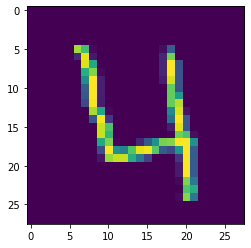

In [8]:
#visulisation of that data
plt.imshow(a)

In [9]:
#data slicing for train-test-split and to fit in algorithm
#storing all the data making dataframe of all the pixel colomns
df_x = df.iloc[:,1:]
#storing all the data making dataframe of label colomn
df_y = df.iloc[:,0]

In [10]:
#applying train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [11]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.head()

32576    5
34735    0
3476     3
27750    0
16211    3
Name: label, dtype: int64

In [13]:
#making a model of Random Forest Calssifier of estimators=100
rf = RandomForestClassifier(n_estimators = 100)
#Then fit x_train and y_train into model and train that model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
#We have made a model and lets test on x_test datas
pred = rf.predict(x_test)

In [15]:
pred

array([0, 4, 0, ..., 0, 3, 1])

In [16]:
#this is the code to find accuracy
s = y_test.values
count = 0

In [17]:
for i in range(len(pred)):
    if pred[i] == s[i]:
        count = count+1

In [18]:
count

8090

In [19]:
len(pred)

8400

In [24]:
8090/8400.0

0.9630952380952381

In [21]:
#this way we can also find accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9630952380952381

In [25]:
#This we can see manually our preiction is how much good and see the result
result = pd.DataFrame({'Actual':y_test,'Prediction':pred})
result

,Actual,Prediction
26068,0,0
11015,4,4
19342,0,0
13440,3,3
29732,7,7
...,...,...
33667,3,3
17550,2,2
38651,0,0
24625,3,3


In [23]:
#We can see that my project of "Hand Written Digit Recognitation" is finised and accuracy is pretty good.